## Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading the Data

In [4]:
data = pd.read_csv("train(1).csv")
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## Display basic details

In [5]:
print("Shape of dataset:", data.shape)
print("\nPreview of data:")
print(data.head())

Shape of dataset: (200000, 202)

Preview of data:
   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var

## Separate features & target

In [6]:
X = data.drop(["ID_code", "target"], axis=1)
y = data["target"]

## Split data into Train and Test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

## Initialize Models

In [8]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier()
}

## Train and Evaluate Models

In [11]:
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"Accuracy: {acc}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Training Logistic Regression...


c:\Users\RIJUL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.91264
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     44880
           1       0.70      0.26      0.38      5120

    accuracy                           0.91     50000
   macro avg       0.81      0.62      0.67     50000
weighted avg       0.90      0.91      0.89     50000

Confusion Matrix:
 [[44292   588]
 [ 3780  1340]]

Training Random Forest...
Accuracy: 0.8976
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     44880
           1       0.00      0.00      0.00      5120

    accuracy                           0.90     50000
   macro avg       0.45      0.50      0.47     50000
weighted avg       0.81      0.90      0.85     50000

Confusion Matrix:
 [[44880     0]
 [ 5120     0]]

Training Gradient Boosting...


c:\Users\RIJUL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RIJUL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\RIJUL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.90034
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     44880
           1       0.84      0.03      0.06      5120

    accuracy                           0.90     50000
   macro avg       0.87      0.52      0.51     50000
weighted avg       0.89      0.90      0.86     50000

Confusion Matrix:
 [[44849    31]
 [ 4952   168]]


## Show Model Comparison

In [12]:
print("\n\nMODEL PERFORMANCE COMPARISON:")
for model, score in results.items():
    print(f"{model}: {score}")



MODEL PERFORMANCE COMPARISON:
Logistic Regression: 0.91264
Random Forest: 0.8976
Gradient Boosting: 0.90034


## Select Best Model (Highest Accuracy)

In [13]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\nBest Model Selected for Production: {best_model_name}")


Best Model Selected for Production: Logistic Regression


## Save Best Model

In [14]:
import pickle
pickle.dump(best_model, open("final_model.pkl", "wb"))

print("\nModel saved as final_model.pkl")


Model saved as final_model.pkl


✅ Model Accuracy: 0.91264

📊 Confusion Matrix:
 [[44292   588]
 [ 3780  1340]]

📄 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44880
           1       0.70      0.26      0.38      5120

    accuracy                           0.91     50000
   macro avg       0.81      0.62      0.67     50000
weighted avg       0.90      0.91      0.89     50000



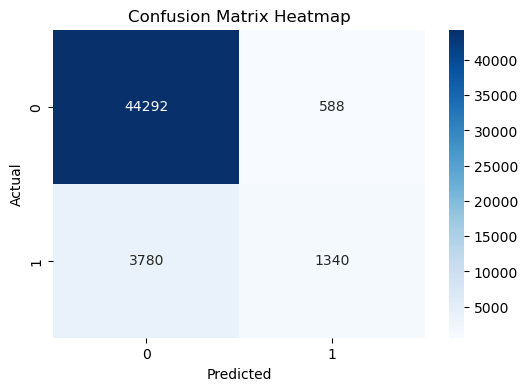

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get predictions
y_pred = best_model.predict(X_test)

# 2. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", accuracy)

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:\n", cm)

# 4. Classification Report
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred))

# 5. Heatmap Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()